In [2]:
#Reading Fits Images
from astropy.io import fits
hdulist = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")

data = hdulist[0].data
hdulist.close()

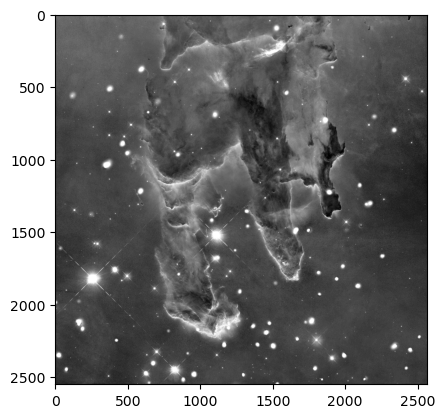

In [3]:
import matplotlib.pyplot as plt

plt.imshow(data[0], cmap='gray')
plt.show()

In [4]:
from astropy.io import fits

hdulist = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")

header = hdulist[0].header

print(header)

hdulist.close()

SIMPLE  =                    T                                                  BITPIX  =                    8                                                  NAXIS   =                    3                                                  NAXIS1  =                 2562                                                  NAXIS2  =                 2550                                                  NAXIS3  =                    3                                                  BSCALE  =         1.000000E+00                                                  BZERO   =         0.000000E+00                                                  DATAMAX =         2.550000E+02                                                  DATAMIN =         0.000000E+00                                                  HISTORY https://imagemagick.org                                                 END                                                                                                                     

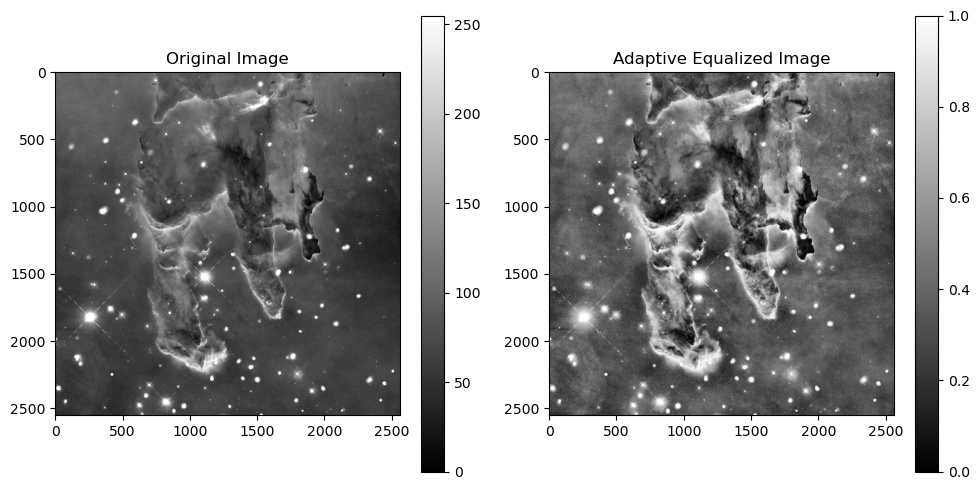

In [5]:
from astropy.io import fits
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np

hdulist = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")

data = hdulist[0].data
header = hdulist[0].header

hdulist.close()

if data.ndim > 2:
    data = data[0]
data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))
data_equalized = exposure.equalize_adapthist(data_normalized)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_equalized, cmap='gray')
plt.title('Adaptive Equalized Image')
plt.colorbar()

plt.tight_layout()
plt.show()

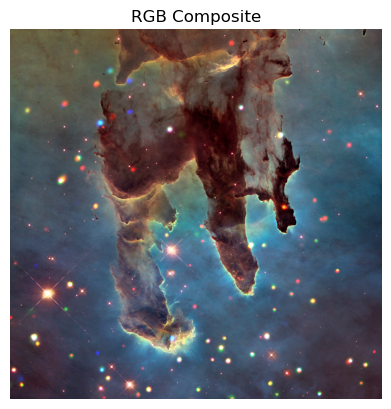

In [7]:
#Composite
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

hdulist = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")
data = hdulist[0].data

hdulist.close()

data_normalized = (data - data.min()) / (data.max() - data.min())

data_rgb = np.transpose(data_normalized, axes=(1, 2, 0))

plt.imshow(data_rgb)
plt.title('RGB Composite')
plt.axis('off')
plt.show()

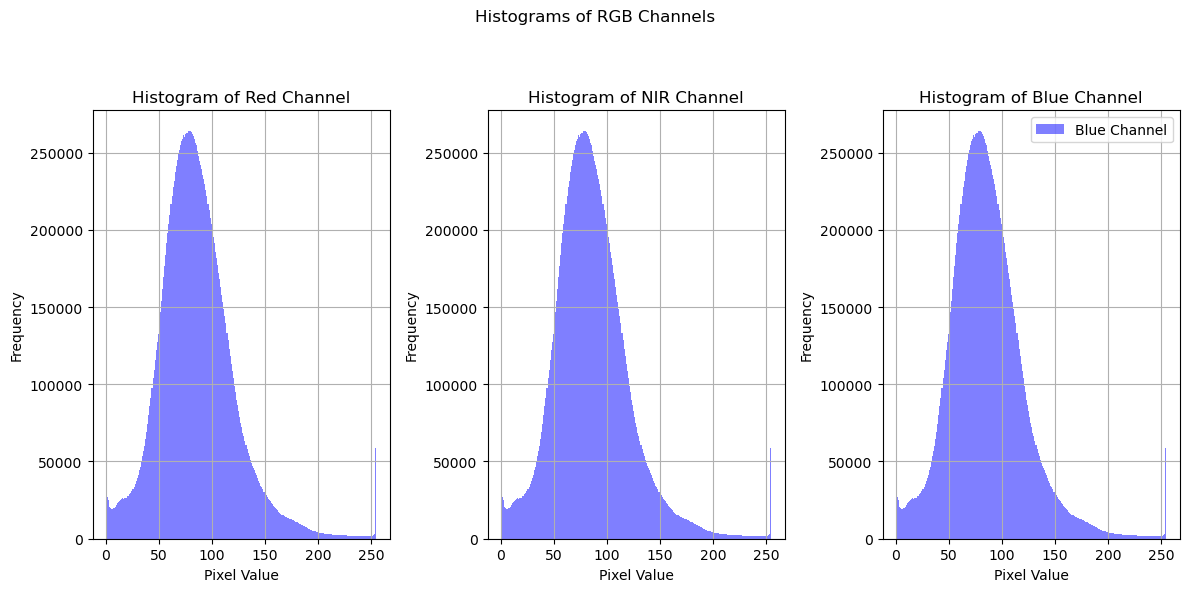

In [8]:
#Histogram
from astropy.io import fits
import matplotlib.pyplot as plt

def plot_histogram(data, label, title):
    plt.hist(data.ravel(), bins=256, color='blue', alpha=0.5, label=label)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title) 
    plt.grid(True)

hdulist_red = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")
hdulist_nir = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")
hdulist_blue = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")

data_red = hdulist_red[0].data
data_nir = hdulist_nir[0].data
data_blue = hdulist_blue[0].data

plt.figure(figsize=(12, 6))
plt.subplot(131)
plot_histogram(data_red, 'Red Channel', 'Histogram of Red Channel')
plt.subplot(132)
plot_histogram(data_nir,  'NIR Channel', 'Histogram of NIR Channel')
plt.subplot(133)
plot_histogram(data_blue, 'Blue Channel', 'Histogram of Blue Channel')

plt.suptitle('Histograms of RGB Channels', fontsize=12)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

In [9]:
#Statistical Data
import numpy as np
from astropy.io import fits

def compute_statistics(data, channel_name):
    mean_value = np.mean(data)
    median_value = np.median(data)

    mode_data = np.round(data).astype(int)
    mode_data = mode_data[mode_data >= 0]
    
    if mode_data.size > 0:
        mode_value = float(np.argmax(np.bincount(mode_data.ravel())))
    else:
        mode_value = None
    
    std_deviation = np.std(data)
    
    print(f"Statistics for {channel_name} Channel:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}\n")
    print(f"Standard Deviation: {std_deviation:.2f}\n")

hdulist_red = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")
hdulist_green = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")
hdulist_blue = fits.open("C:\\Users\\AL-MALAK\\Downloads\\vertopal.com_m16 (1).fits")

data_red = hdulist_red[0].data
data_nir = hdulist_green[0].data
data_blue = hdulist_blue[0].data

hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

compute_statistics(data_red, 'Red')
compute_statistics(data_nir, 'NIR')
compute_statistics(data_blue, 'Blue')

Statistics for Red Channel:
Mean: 85.38
Median: 82.00
Mode: 79.0

Standard Deviation: 35.56

Statistics for NIR Channel:
Mean: 85.38
Median: 82.00
Mode: 79.0

Standard Deviation: 35.56

Statistics for Blue Channel:
Mean: 85.38
Median: 82.00
Mode: 79.0

Standard Deviation: 35.56

